<a href="https://colab.research.google.com/github/UgurUysal86/My-ML-Notebooks/blob/main/classification-image-data/ex-3/20240520_Detecting_Military_Objects_on_Images_Using_a_Pretrained_image_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Ugur Uysal](https://github.com/UgurUysal86) - ugur.uysal.86@gmail.com - 20. MAY 2024
## Detecting Military Objects on Images Using a Pretrained image Classification Model

* This notebook is a practical example of applying deep learning to the field of military object detection using a well-known neural network architecture utilizing tensorflow.keras.

# 1. Import python packages

The code below you provided imports necessary libraries for working with images and TensorFlow.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
import tensorflow as tf
print("Using Tensorflow Version", tf.__version__, "\n")

Using Tensorflow Version 2.15.0 



## 2. Loading the pretrained neural network EfficientNetV2

The code below loads the pre-trained EfficientNetV2 model from TensorFlow’s Keras applications.

In [ ]:
model = tf.keras.applications.EfficientNetV2M(weights='imagenet') # expected shape=(None, 480, 480, 3)

## 3.  Setting parameters for Classifying objects

the code below defines a list called Military_objects_in_imagenet containing various military-related classes corresponding to object classes in an image classification task using the ImageNet dataset. The top_classes variable indicate the number of top predictions.

In [ ]:
top_classes = 1000 # number of top predictions to display
Military_objects_in_imagenet = ['tank', 'amphibian', 'half_track', 'aircraft_carrier', 'assault_rifle', 'backpack', 'binoculars', 'bulletproof_vest', 'cannon', 'gasmask', 'holster', 'jeep', 'military_uniform', 'missile', 'mortar', 'parachute', 'revolver', 'rifle', 'scuba_diver', 'snowmobile', 'submarine', 'warplane', 'projectile']

# 4. Loading functions to predict and visualize predicted classes of objects on images with the loaded neural network

The code bwlow defines two functions: predict_classes, which classifies objects in an image using a pre-trained EfficientNetV2 model, and classify_image, which downloads an image, saves it locally, and reports detected classes based on military-related classes.

In [ ]:
def predict_classes(image_file):
    print('Classifying objects on image ' + image_file)

    img = tf.keras.preprocessing.image.load_img(image_file, target_size=(480, 480))
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)
    img_tensor = np.array([img_tensor]) # Converts single image to a batch.
    img_tensor = tf.keras.applications.efficientnet_v2.preprocess_input(img_tensor)
    pred = model.predict(img_tensor)

    top_predictions = tf.keras.applications.efficientnet.decode_predictions(pred, top=top_classes)[0]
    plt.figure(figsize=(12, 12))
    plt.imshow(plt.imread(image_file))
    plt.title(top_predictions[0])
    plt.show()
    return top_predictions


def classify_image(image_path, image_file):
    image = imread(image_path) # download the image from the URL
    plt.imsave(image_file, image) # saves the image in the colab environment
    top_predictions = predict_classes(image_file)

    print('\nReport for image ' + img_file + ':')
    for pred in top_predictions:
        if pred[1] in Military_objects_in_imagenet: print('Class ' + pred[1] + ' detected with ' + str(np.round(pred[2]*100,2)) + "%")

# 4. Classify objects on images with the loaded neural network

The code below downloads images from the specified URLs, saves them, and then attempts to classify their content using the classify_image function from above.

Classifying objects on image BMP-2_of_Russian_Ground_Forces.jpg
1/1 [==============================] - 6s 6s/step


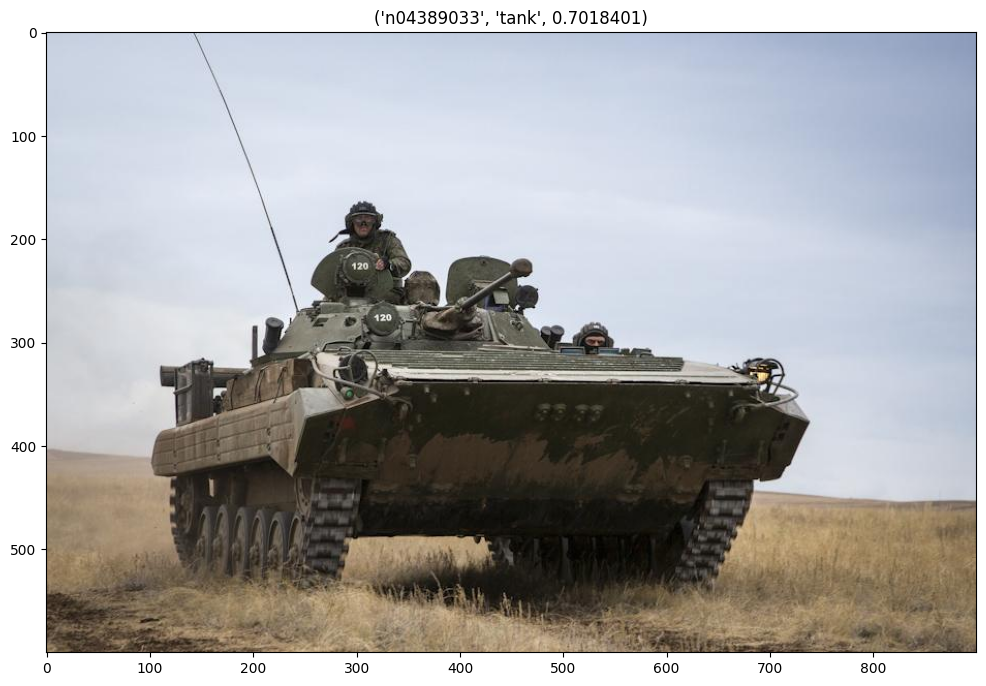

In [ ]:
Image_URL = "https://upload.wikimedia.org/wikipedia/commons/c/c9/BMP-2_of_Russian_Ground_Forces.jpg" # Image Reference: Mil.ru, BMP-2 of Russian Ground Forces.jpg, CC BY 4.0, via Wikimedia Commons. Classnames, and prediction accuracy of class tank objects added to the image with the code in this notebook.
img_file = "BMP-2_of_Russian_Ground_Forces.jpg" # the name of the image file
classify_image(Image_URL, img_file)


Report for image BMP-2_of_Russian_Ground_Forces.jpg:
Class tank detected with 70.18%
Class amphibian detected with 10.39%
Class half_track detected with 0.76%
Class cannon detected with 0.37%
Class projectile detected with 0.15%
Class military_uniform detected with 0.14%
Class missile detected with 0.1%
Class jeep detected with 0.09%
Class assault_rifle detected with 0.08%
Class aircraft_carrier detected with 0.06%
Class bulletproof_vest detected with 0.06%
Class snowmobile detected with 0.05%
Class rifle detected with 0.04%
Class submarine detected with 0.04%
Class warplane detected with 0.04%
Class binoculars detected with 0.02%
Class mortar detected with 0.02%
Class parachute detected with 0.02%
Class gasmask detected with 0.01%
Class revolver detected with 0.01%
Class backpack detected with 0.01%
Class holster detected with 0.01%
Class scuba_diver detected with 0.01%
Classifying objects on image TankExercise2020-19.jpg
1/1 [==============================] - 0s 43ms/step


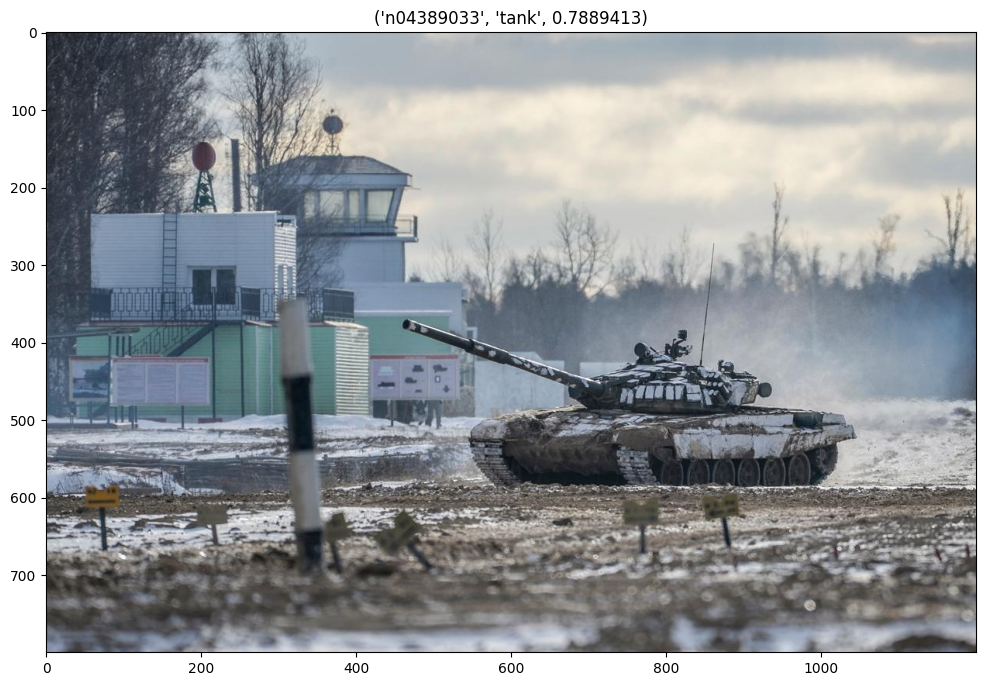


Report for image TankExercise2020-19.jpg:
Class tank detected with 78.89%
Class amphibian detected with 0.9%
Class cannon detected with 0.45%
Class half_track detected with 0.25%
Class projectile detected with 0.13%
Class missile detected with 0.13%
Class jeep detected with 0.09%
Class snowmobile detected with 0.07%
Class military_uniform detected with 0.07%
Class aircraft_carrier detected with 0.05%
Class assault_rifle detected with 0.05%
Class rifle detected with 0.03%
Class warplane detected with 0.03%
Class submarine detected with 0.03%
Class bulletproof_vest detected with 0.02%
Class binoculars detected with 0.02%
Class mortar detected with 0.02%
Class parachute detected with 0.02%
Class backpack detected with 0.02%
Class gasmask detected with 0.01%
Class revolver detected with 0.01%
Class holster detected with 0.01%
Class scuba_diver detected with 0.01%


In [ ]:
Image_URL = "https://upload.wikimedia.org/wikipedia/commons/9/90/TankExercise2020-19.jpg" # Image Reference: Mil.ru, TankExercise2020-19.jpg, CC BY 4.0, via Wikimedia Commons. Classnames, and prediction accuracy of class tank objects added to the image with the code in this notebook.
img_file = "TankExercise2020-19.jpg" # the name of the image file
classify_image(Image_URL, img_file)

Classifying objects on image Russian_Ground_Forces_Iveco_LMV.jpg
1/1 [==============================] - 0s 41ms/step


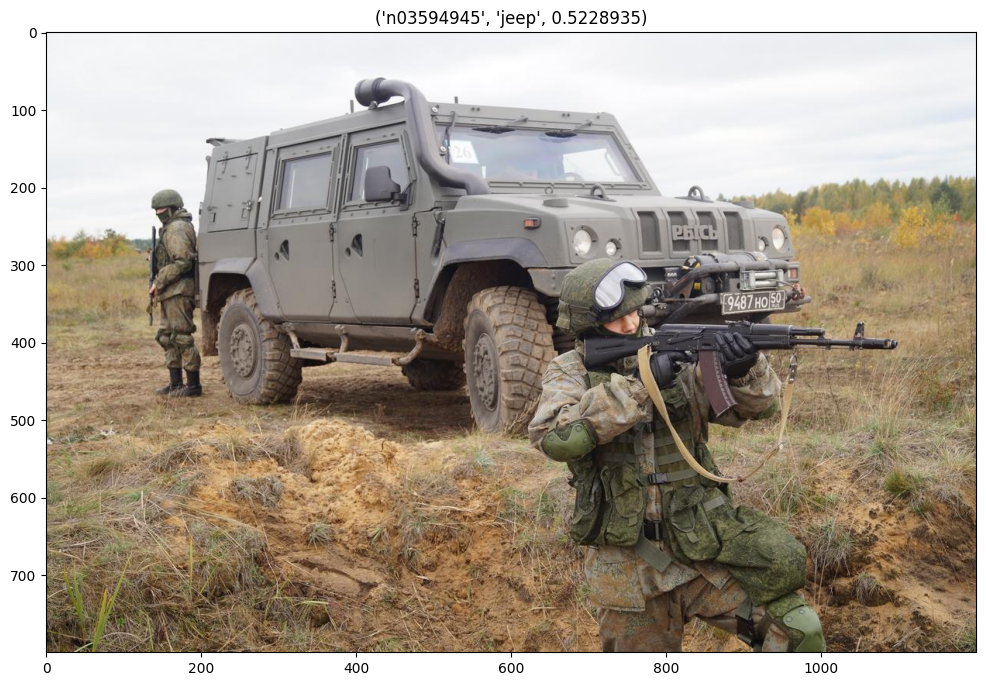


Report for image Russian_Ground_Forces_Iveco_LMV.jpg:
Class jeep detected with 52.29%
Class military_uniform detected with 4.26%
Class half_track detected with 3.53%
Class assault_rifle detected with 3.51%
Class tank detected with 2.13%
Class rifle detected with 1.17%
Class bulletproof_vest detected with 1.04%
Class amphibian detected with 0.53%
Class projectile detected with 0.28%
Class missile detected with 0.15%
Class cannon detected with 0.13%
Class holster detected with 0.09%
Class revolver detected with 0.08%
Class warplane detected with 0.07%
Class gasmask detected with 0.06%
Class mortar detected with 0.05%
Class binoculars detected with 0.04%
Class submarine detected with 0.04%
Class aircraft_carrier detected with 0.03%
Class snowmobile detected with 0.03%
Class scuba_diver detected with 0.03%
Class parachute detected with 0.03%
Class backpack detected with 0.02%


In [ ]:
Image_URL = "https://upload.wikimedia.org/wikipedia/commons/5/55/Russian_Ground_Forces_Iveco_LMV.jpg" # Image Reference: Mil.ru, Russian_Ground_Forces_Iveco_LMV.jpg, CC BY 4.0, via Wikimedia Commons. Classnames, and prediction accuracy of class tank objects added to the image with the code in this notebook.
img_file = "Russian_Ground_Forces_Iveco_LMV.jpg" # the name of the image file
classify_image(Image_URL, img_file)

Classifying objects on image Su-27SM3_in_flight%2C_Celebration_of_the_100th_anniversary_of_Russian_Air_Force.jpg
1/1 [==============================] - 0s 41ms/step


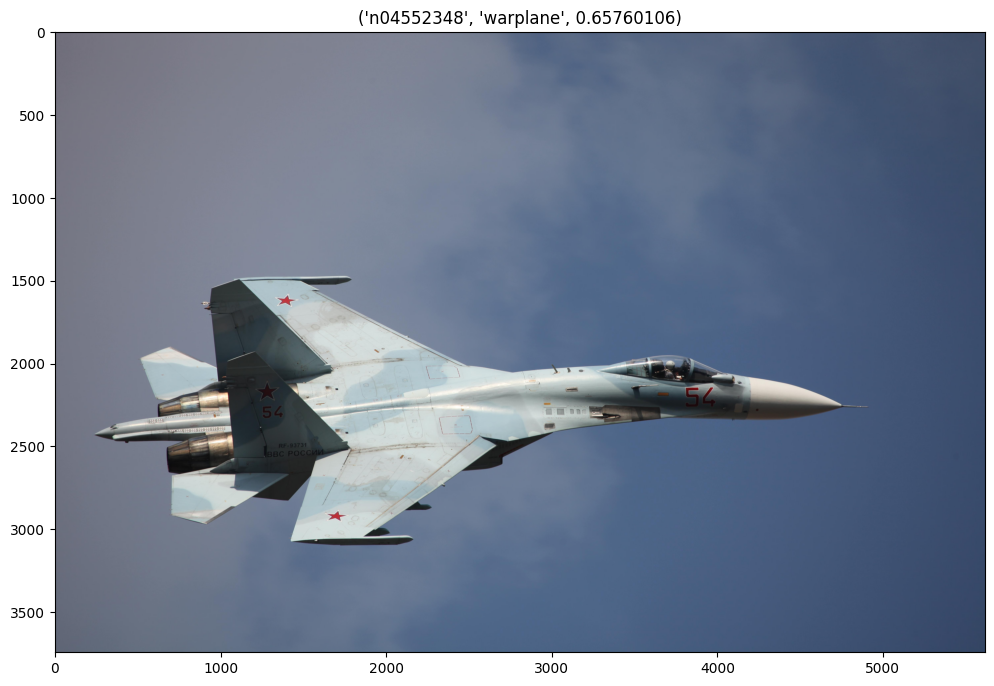


Report for image Su-27SM3_in_flight%2C_Celebration_of_the_100th_anniversary_of_Russian_Air_Force.jpg:
Class warplane detected with 65.76%
Class missile detected with 2.13%
Class projectile detected with 2.08%
Class parachute detected with 2.0%
Class aircraft_carrier detected with 0.23%
Class snowmobile detected with 0.04%
Class tank detected with 0.04%
Class cannon detected with 0.03%
Class submarine detected with 0.02%
Class revolver detected with 0.02%
Class scuba_diver detected with 0.02%
Class rifle detected with 0.02%
Class military_uniform detected with 0.02%
Class jeep detected with 0.02%
Class amphibian detected with 0.02%
Class assault_rifle detected with 0.02%
Class binoculars detected with 0.01%
Class bulletproof_vest detected with 0.01%
Class backpack detected with 0.01%
Class half_track detected with 0.01%
Class gasmask detected with 0.01%
Class mortar detected with 0.01%
Class holster detected with 0.01%


In [ ]:
Image_URL = "https://upload.wikimedia.org/wikipedia/commons/4/49/Su-27SM3_in_flight%2C_Celebration_of_the_100th_anniversary_of_Russian_Air_Force.jpg" # Image Reference: Vitaly V. Kuzmin, Su-27SM3 in flight, Celebration of the 100th anniversary of Russian Air Force.jpg, CC BY-SA 4.0, via Wikimedia Commons. Classnames, and prediction accuracy of class tank objects added to the image with the code in this notebook.
classify_image(Image_URL, img_file)

Classifying objects on image Russian_aircraft_carrier_Kuznetsov.jpg
1/1 [==============================] - 0s 41ms/step


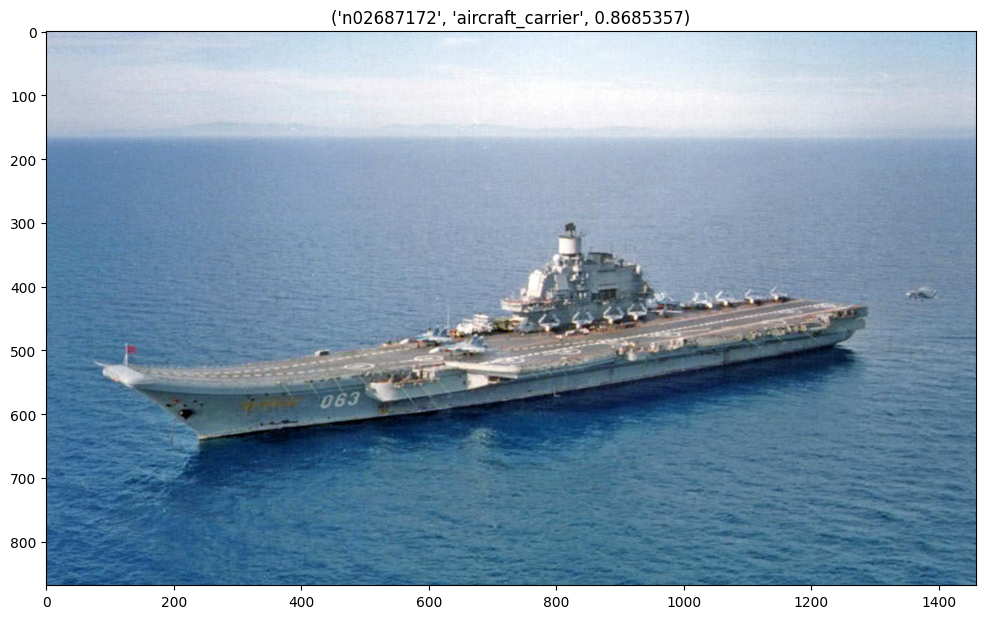


Report for image Russian_aircraft_carrier_Kuznetsov.jpg:
Class aircraft_carrier detected with 86.85%
Class warplane detected with 0.2%
Class submarine detected with 0.14%
Class projectile detected with 0.07%
Class missile detected with 0.06%
Class tank detected with 0.04%
Class amphibian detected with 0.04%
Class cannon detected with 0.03%
Class backpack detected with 0.03%
Class gasmask detected with 0.02%
Class half_track detected with 0.02%
Class binoculars detected with 0.01%
Class assault_rifle detected with 0.01%
Class parachute detected with 0.01%
Class rifle detected with 0.01%
Class snowmobile detected with 0.01%
Class mortar detected with 0.01%
Class holster detected with 0.01%
Class military_uniform detected with 0.01%
Class jeep detected with 0.01%
Class scuba_diver detected with 0.01%
Class bulletproof_vest detected with 0.01%
Class revolver detected with 0.01%


In [ ]:
Image_URL = "https://upload.wikimedia.org/wikipedia/commons/c/c6/Russian_aircraft_carrier_Kuznetsov.jpg" # Image Reference: US DOD, Russian aircraft carrier Kuznetsov.jpg, public domain, via Wikimedia Commons. Classnames, and prediction accuracy of class tank objects added to the image with the code in this notebook.
img_file = "Russian_aircraft_carrier_Kuznetsov.jpg" # the name of the image file
classify_image(Image_URL, img_file)

## References:
* TensorFlow: https://www.tensorflow.org/
* Keras Usage examples for image classification models: https://keras.io/api/applications/
* Keras Applications EfficientNetV2 B0 to B3 and S, M, L: https://keras.io/api/applications/efficientnet_v2/

**Images References:**

- [Test image 1](https://commons.wikimedia.org/wiki/File:BMP-2_of_Russian_Ground_Forces.jpg), Mil.ru via Wikimedia Commons, licensed under [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/). Classnames and prediction accuracy of class tank objects added to the image with the code in this notebook.

- [Test image 2](https://commons.wikimedia.org/wiki/File:TankExercise2020-19.jpg), Mil.ru via Wikimedia Commons, licensed under [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/). Classnames and prediction accuracy of class tank objects added to the image with the code in this notebook.

- [Test image 3](https://commons.wikimedia.org/wiki/File:Russian_Ground_Forces_Iveco_LMV.jpg), Mil.ru via Wikimedia Commons, licensed under [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/). Classnames and prediction accuracy of class tank objects added to the image with the code in this notebook.

- [Test image 4](https://commons.wikimedia.org/wiki/File:Su-27SM3_in_flight,_Celebration_of_the_100th_anniversary_of_Russian_Air_Force.jpg), Vitaly V. Kuzmin via Wikimedia Commons, licensed under [Creative Commons Sharealike Attribution 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/). Classnames and prediction accuracy of class tank objects added to the image with the code in this notebook.

- [Test image 5](https://commons.wikimedia.org/wiki/File:Russian_aircraft_carrier_Kuznetsov.jpg), US DOD via Wikimedia Commons, public domain. Classnames and prediction accuracy of class tank objects added to the image with the code in this notebook.

## License:
Copyright (c) 2024 Ugur Uysal

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## Thank you. Visit my personal GitHub page https://github.com/UgurUysal86 for more examples.